<a href="https://colab.research.google.com/github/Endework/Zindi_projects/blob/Bill/Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Data Collection:

#Download the CIFAR-10 or Fashion MNIST dataset. These datasets contain small images of 10 different classes (e.g., cats, dogs, airplanes, etc.).
import urllib.request
import tarfile

url = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
file_name = "cifar-10-python.tar.gz"

# Download the file
urllib.request.urlretrieve(url, file_name)

# Extract the contents
with tarfile.open(file_name, "r:gz") as tar:
    tar.extractall()


In [2]:
from tensorflow.keras.datasets import fashion_mnist

# Load the Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


Keys in the dataset: dict_keys([b'batch_label', b'labels', b'data', b'filenames'])


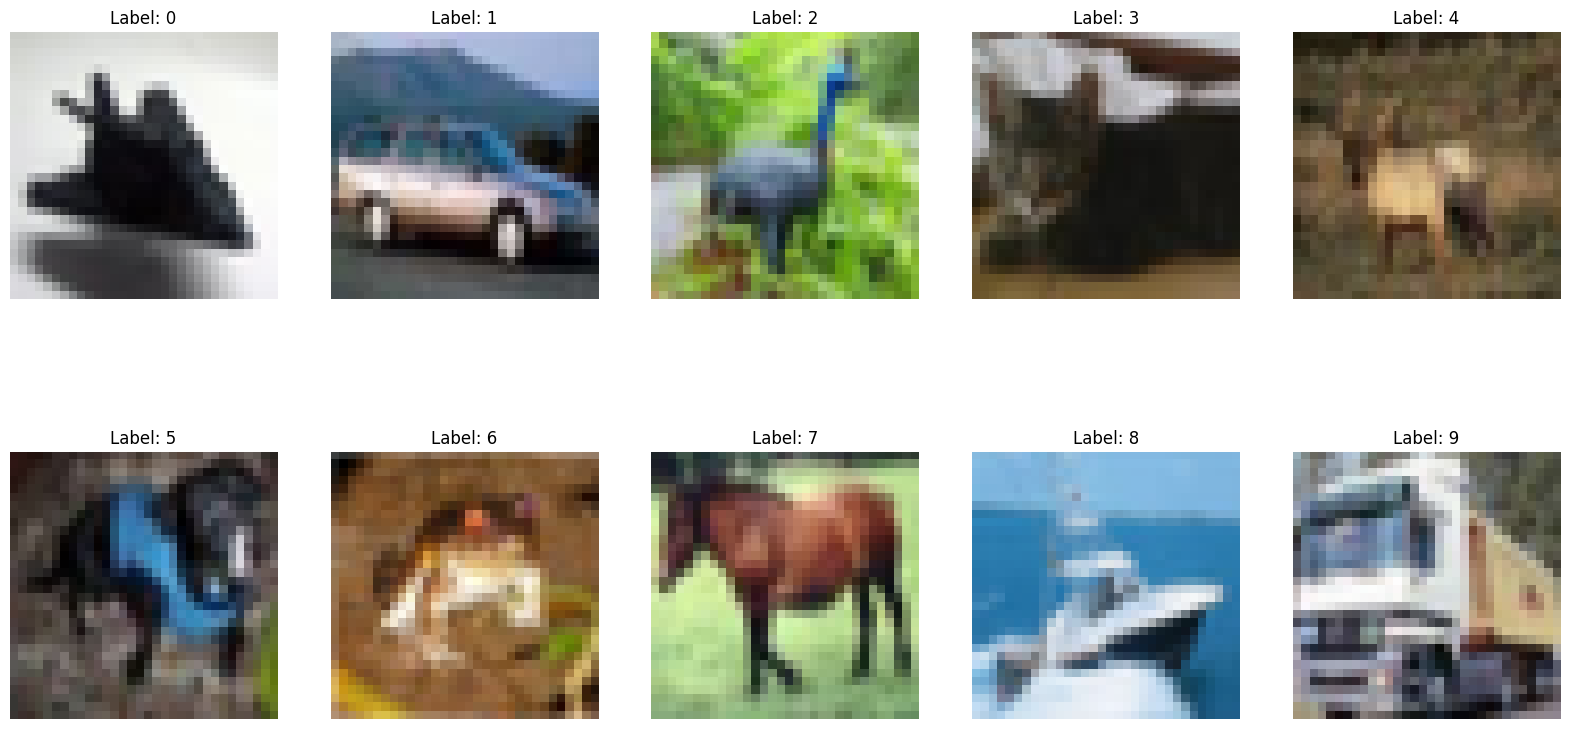

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Load CIFAR-10 data
import pickle

def load_cifar10_batch(file_path):
    with open(file_path, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

batch_1 = load_cifar10_batch('cifar-10-batches-py/data_batch_1')

# Explore the dataset structure
print("Keys in the dataset:", batch_1.keys())

# Get labels and data
labels = batch_1[b'labels']
data = batch_1[b'data']

# Reshape the data into images (32x32 pixels with 3 channels - RGB)
images = data.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)

# Display sample images
# Initialize a list to store the indices of the first image of each label
first_image_indices = []

# Find the index of the first image of each label
for i in range(10):
    first_image_indices.append(labels.index(i))

# Display the first image of each label
plt.figure(figsize=(20, 10))
for i, image_index in enumerate(first_image_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[image_index])
    plt.title(f"Label: {i}")  # Use the label number instead of the class name
    plt.axis('off')

plt.show()



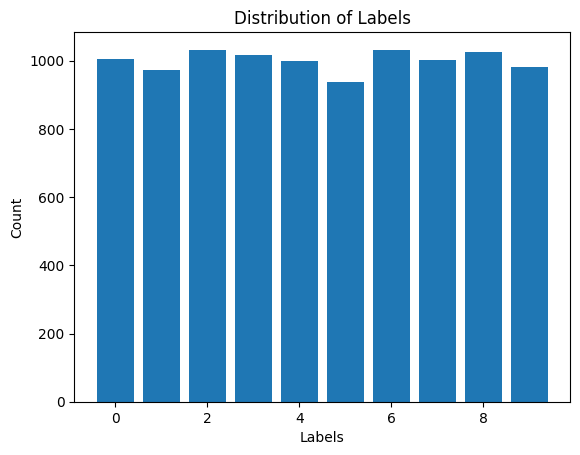

In [15]:
import matplotlib.pyplot as plt

# Create a bar plot
plt.bar(unique_labels, counts)

# Add labels and title
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Distribution of Labels')

# Show the plot
plt.show()


In [6]:
# Convert labels to a numpy array
labels_np = np.array(labels)

# Get unique labels and their counts
unique_labels, counts = np.unique(labels_np, return_counts=True)

# Print the unique labels and their counts
for label, count in zip(unique_labels, counts):
    print(f"Label: {label}, Count: {count}")


Label: 0, Count: 1005
Label: 1, Count: 974
Label: 2, Count: 1032
Label: 3, Count: 1016
Label: 4, Count: 999
Label: 5, Count: 937
Label: 6, Count: 1030
Label: 7, Count: 1001
Label: 8, Count: 1025
Label: 9, Count: 981


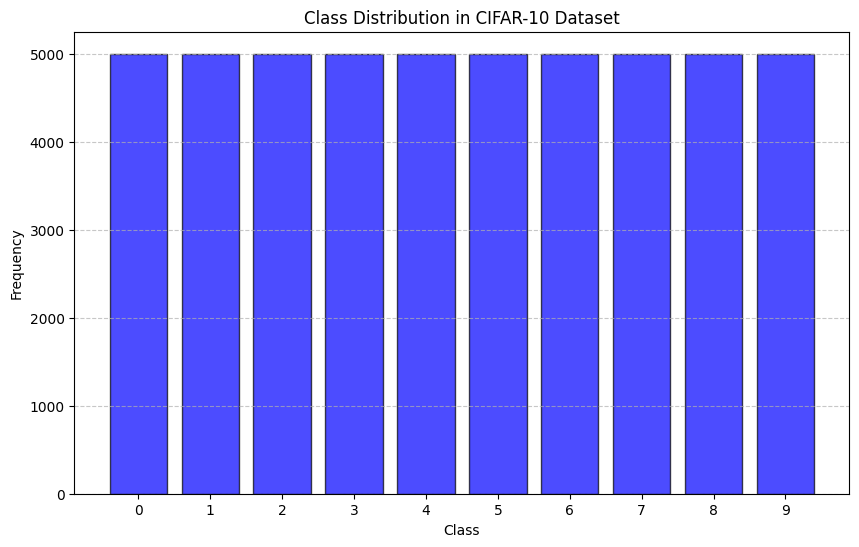

In [7]:
# Explore the distribution of classes to ensure a balanced dataset.
import numpy as np
import matplotlib.pyplot as plt

# Load CIFAR-10 data
import pickle

def load_cifar10_batch(file_path):
    with open(file_path, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# Load all batches and concatenate the labels
all_labels = []
for i in range(1, 6):
    batch_data = load_cifar10_batch(f'cifar-10-batches-py/data_batch_{i}')
    all_labels.extend(batch_data[b'labels'])

# Convert to NumPy array for easier manipulation
all_labels = np.array(all_labels)

# Plot the class distribution
plt.figure(figsize=(10, 6))
plt.hist(all_labels, bins=np.arange(11) - 0.5, rwidth=0.8, color='blue', alpha=0.7, edgecolor='black')

plt.title('Class Distribution in CIFAR-10 Dataset')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(np.arange(10))
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [8]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import cv2


# Step 1: Resize images to a consistent size (e.g., 64x64 pixels)
resized_images = np.array([cv2.resize(img, (64, 64)) for img in images])

# Step 2: Normalize pixel values
normalized_images = resized_images / 255.0

# Step 3: One-Hot Encode labels
one_hot_labels = to_categorical(labels, num_classes=10)  # Assuming 10 classes

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(normalized_images, one_hot_labels, test_size=0.2, random_state=42)

# Now X_train, X_test, y_train, y_test are ready for training and testing your deep learning model


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense



# Define  model architecture
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))  # Assuming 10 output classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(normalized_images, one_hot_labels, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
250/250 [==============================] - 36s 140ms/step - loss: 1.8774 - accuracy: 0.3147 - val_loss: 1.6152 - val_accuracy: 0.4185
Epoch 2/10
250/250 [==============================] - 36s 144ms/step - loss: 1.5248 - accuracy: 0.4379 - val_loss: 1.4881 - val_accuracy: 0.4690
Epoch 3/10
250/250 [==============================] - 33s 133ms/step - loss: 1.3446 - accuracy: 0.5085 - val_loss: 1.3243 - val_accuracy: 0.5240
Epoch 4/10
250/250 [==============================] - 32s 128ms/step - loss: 1.1934 - accuracy: 0.5655 - val_loss: 1.2846 - val_accuracy: 0.5350
Epoch 5/10
250/250 [==============================] - 32s 130ms/step - loss: 1.0580 - accuracy: 0.6202 - val_loss: 1.2190 - val_accuracy: 0.5735
Epoch 6/10
250/250 [==============================] - 32s 128ms/step - loss: 0.9245 - accuracy: 0.6715 - val_loss: 1.2434 - val_accuracy: 0.5645
Epoch 7/10
250/250 [==============================] - 32s 126ms/step - loss: 0.7832 - accuracy: 0.7222 - val_loss: 1.3003 - val_ac

In [10]:

evaluation = model.evaluate(X_test, y_test)
print(f"Test Loss: {evaluation[0]}, Test Accuracy: {evaluation[1]}")


63/63 [==============================] - 2s 34ms/step - loss: 0.5237 - accuracy: 0.8565
Test Loss: 0.5237462520599365, Test Accuracy: 0.8565000295639038


63/63 [==============================] - 2s 35ms/step


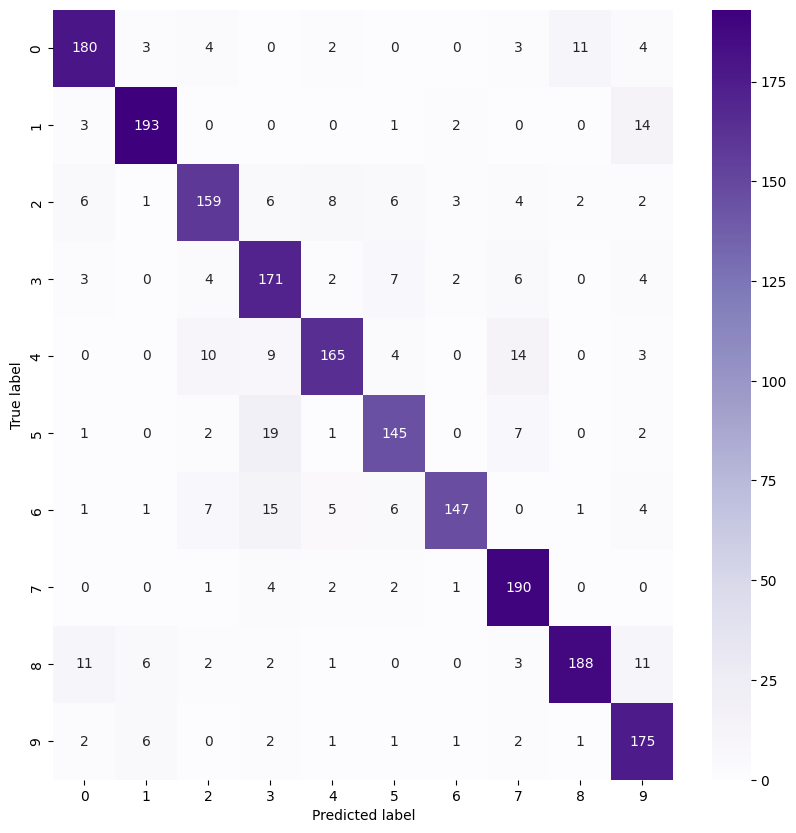

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Assuming 'X_test' and 'y_test' are your test data
y_pred = model.predict(X_test)

# Convert the predictions from probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert the one-hot encoded labels to class labels
y_test_classes = np.argmax(y_test, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [16]:
!wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz


--2024-03-04 10:05:33--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz.1’

cifar-10-python.tar 100%[===================>] 162.60M  49.5MB/s    in 3.5s    

2024-03-04 10:05:37 (46.0 MB/s) - ‘cifar-10-python.tar.gz.1’ saved [170498071/170498071]



In [17]:
! tar -xzvf cifar-10-python.tar.gz


cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [18]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define a callback to save the model weights during training
checkpoint_callback = ModelCheckpoint('Model', save_best_only=True)

# Train the model with the added callback
model.fit(normalized_images, one_hot_labels, epochs=10, batch_size=32, validation_split=0.2, callbacks=[checkpoint_callback])


Epoch 1/10
250/250 [==============================] - 36s 145ms/step - loss: 0.3008 - accuracy: 0.8931 - val_loss: 1.7350 - val_accuracy: 0.5845
Epoch 2/10
250/250 [==============================] - 35s 141ms/step - loss: 0.2268 - accuracy: 0.9226 - val_loss: 1.9630 - val_accuracy: 0.5775
Epoch 3/10
250/250 [==============================] - 33s 133ms/step - loss: 0.1661 - accuracy: 0.9449 - val_loss: 2.1204 - val_accuracy: 0.5770
Epoch 4/10
250/250 [==============================] - 33s 132ms/step - loss: 0.1213 - accuracy: 0.9611 - val_loss: 2.5013 - val_accuracy: 0.5820
Epoch 5/10
250/250 [==============================] - 37s 150ms/step - loss: 0.0994 - accuracy: 0.9669 - val_loss: 2.5948 - val_accuracy: 0.5750
Epoch 6/10
250/250 [==============================] - 34s 134ms/step - loss: 0.1141 - accuracy: 0.9609 - val_loss: 2.7096 - val_accuracy: 0.5770
Epoch 7/10
250/250 [==============================] - 33s 131ms/step - loss: 0.1054 - accuracy: 0.9655 - val_loss: 2.7460 - val_ac

In [19]:
from tensorflow.keras.models import load_model

model = load_model('Model')  # Replace with your actual model filename


In [37]:
! cd cifar-10-batches-py
! mkdir selected_images

In [38]:
from tensorflow.keras.models import load_model

# Load your trained model
model = load_model('Model')  # Replace with your actual model filename


In [42]:
# preprocessing the new data
import os

# Assuming 'selected_images' is the directory containing your selected images
selected_images_directory = '/content/selected_images'  # Replace with the correct path

# Get the list of image file paths in the selected directory
selected_images = [os.path.join(selected_images_directory, image_file) for image_file in os.listdir(selected_images_directory)]

# Load and preprocess selected images
image_size = 64
selected_data = []
for image_path in selected_images:
    image = cv2.imread(image_path)
    resized_image = cv2.resize(image, (image_size, image_size)) / 255.0
    selected_data.append(resized_image)

# Convert the list to a NumPy array
preprocessed_selected_data = np.array(selected_data)


In [43]:
import os

# Specify the full path to your selected images directory
selected_images_directory_full = '/content/selected_images'

# Get the list of JPEG image file paths in the selected directory
selected_images = [os.path.join(selected_images_directory_full, image_file) for image_file in os.listdir(selected_images_directory_full) if image_file.lower().endswith(('.jpg', '.jpeg'))]

# Check if there are any images
if not selected_images:
    print("Error: No images found in the selected directory.")
else:
    # Load and preprocess selected images
    image_size = 64
    selected_data = []
    for image_path in selected_images:
        image = cv2.imread(image_path)
        resized_image = cv2.resize(image, (image_size, image_size)) / 255.0
        selected_data.append(resized_image)

    # Convert the list to a NumPy array
    preprocessed_selected_data = np.array(selected_data)

    # Check if there is any data to predict
    if preprocessed_selected_data.shape[0] == 0:
        print("Error: No data to predict.")
    else:
        # Make predictions
        predictions = model.predict(preprocessed_selected_data)

        # Convert the predictions to class labels
        predicted_labels = np.argmax(predictions, axis=1)

        # Now 'predicted_labels' contains the predicted class labels for the selected images
        print("Predicted Labels:", predicted_labels)


1/1 [==============================] - 0s 24ms/step
Predicted Labels: [5 0 1 2 0 1 1 0 0]


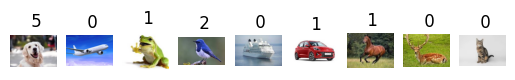

In [44]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Assuming 'selected_images' is the list of image paths
for i, (image_path, predicted_label) in enumerate(zip(selected_images, predicted_labels), start=1):
    image = mpimg.imread(image_path)

    plt.subplot(1, len(selected_images), i)
    plt.imshow(image)
    plt.title(f" {predicted_label}")
    plt.axis("off")

plt.show()


In [45]:
# Examining the prediction
actual_labels = [5,0,6,2,8,1,7,4,3]

accuracy = np.mean(np.array(actual_labels) == np.array(predicted_labels))
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 44.44%
